# Introduction to Data Science: a python approach to concepts techniques and applications
-Laura Igual & Santi Sequi

Working through this book and implementing the examples in p3

## Introduction to Data Science

**Datafication** the process of rendering into data aspects of the world that have never been quantified before.

**Democratization of Data Analysis** the recent availability of open analytic tools makes it possible for anyone to use rich data to take evidence-based decisions.

**Data Science** a methodology by which actionable insights can be inferred from data. ...The production of beliefs informaed by data and to be used as the basis of decision making. Data Science allows four different strategies to explore the world using data:

1. *Probing reality* the responce of the world to our actions. e.g. A/B testing for web development.
2. *Pattern discovery* discover useful patterns and natural clusters to simplify solutions.
3. *Predicting future events* allow decisions to be taken in response to future events, not only reactively.
4. *Understanding people and the world* natural language, computer vision, psychology and neuroscience.

**This book** demystify data science by describing a set of tools and techniques thatallows a person with basic skills in computer science, mathematics and statistics to perform the tasks commonly associated with data science.



## Toolboxes for Data Scienctists

**Fundamental Python Libraries**
1. *Numpy* support for multidimentional arrays
2. *SciPy* collections of algorithms and toolboxes for stats, signal processing, optimization etc.
3. *SCIKIT-Learn* machine learning library for classification, regression, model selection etc.
4. *PANDAS* dataframes & data analysis tools.
5. *Matplotlib* pretty pictures.


In [99]:
#import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tabulate as tbl
import seaborn as sns

In [2]:
#pandas data.frames
#basically just like R data.frmaes. tabular structures with rows and columns
data = { 'year': [
    2010, 2011, 2012,
    2010, 2011, 2012,
    2010, 2011, 2012 ], 
       'team': [
           'FCBarcelona', 'FCBarcelona', 'FCBarcelona',
           'RMadrid', 'RMadrid', 'RMadrid',
           'VallenciaCF', 'VallenciaCF', 'ValenciaCF'],
       'wins': [30, 28, 32, 29, 32, 26, 21, 17, 19],
       'draws': [6, 7, 4, 5, 4, 7, 8, 19, 8],
       'losses': [2, 3, 2, 4, 2, 5, 9, 11, 11]}
football = pd.DataFrame( data, columns = [
    'year', 'team', 'wins', 'draws', 'losses'])
football

,year,team,wins,draws,losses
0,2010,FCBarcelona,30,6,2
1,2011,FCBarcelona,28,7,3
2,2012,FCBarcelona,32,4,2
3,2010,RMadrid,29,5,4
4,2011,RMadrid,32,4,2
5,2012,RMadrid,26,7,5
6,2010,VallenciaCF,21,8,9
7,2011,VallenciaCF,17,19,11
8,2012,ValenciaCF,19,8,11


In [3]:
#importing data from a .csv to a pandas dataframe
edu_url = 'https://raw.githubusercontent.com/DataScienceUB/introduction-datascience-python-book/master/files/ch02/educ_figdp_1_Data.csv'
edu_df = pd.read_csv( edu_url, 
                    na_values = ':',
                    usecols = ['TIME', 'GEO', 'Value'])

read_csv is much R method to do the same. other methods to import data: `read_excel()`, `read_table()`, `read_hdf()` and even a method to read from clipboard: `read_clipboard()`

In [4]:
edu_df.head( 5 )

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [5]:
edu_df.tail( 4 )

,TIME,GEO,Value
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


In [6]:
#describe() works much like summary() in R:
edu_df.describe()

,TIME,Value
count,384.000000,361.000000
mean,2005.500000,5.203989
std,3.456556,1.021694
min,2000.000000,2.880000
25%,2002.750000,4.620000
50%,2005.500000,5.060000
75%,2008.250000,5.660000
max,2011.000000,8.810000


In [7]:
#selecting data
edu_df.loc[ 13:15, [ 'TIME', 'Value' ] ]
#iloc is really handy too

,TIME,Value
13,2001,4.99
14,2002,5.00
15,2003,5.04


In [8]:
#filtering data
len( edu_df[ edu_df[ 'Value' ] > 6.5 ] )

33

**The only safe way to tell if a value is missing in a DataFrame is by using the isnull() function**

In [9]:
len( edu_df[ edu_df[ "Value" ].isnull() ] )

23

Common Aggregation Functions: `count()`, `sum()`, `mean()`, `median()`, `min()`, `max()`, `prod()`, `std()`, `var()`

In [10]:
print( 'Pandas max fxn:', edu_df[ 'Value'].max() )
print( 'Python max fxn:', max( edu_df[ 'Value' ] ) )

Pandas max fxn: 8.81
Python max fxn: nan


In [11]:
#Applying Operations to values in rows/columns or rows&columns:
s = edu_df[ "Value" ]/100
s.head()

s = edu_df[ "Value" ].apply( np.sqrt )
s.head()

#in line functions
s = edu_df[ "Value" ].apply( lambda d: d**2 )
s.head()

0        NaN
1        NaN
2    25.0000
3    25.3009
4    24.5025
Name: Value, dtype: float64

In [12]:
#New Feature based on Old
edu_df[ "ValueNorm" ]= edu_df[ "Value" ]/edu_df[ "Value" ].max()
edu_df.tail()

,TIME,GEO,Value,ValueNorm
379,2007,Finland,5.90,0.669694
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777526
383,2011,Finland,6.76,0.767310


In [13]:
#removing features with drop()
edu_df.drop( [ 'ValueNorm' ], axis=1, inplace=True)
edu_df.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [14]:
#appending a row
edu_df_new = pd.DataFrame( { "TIME" : [ 2000 ] , "Value" : [ 5.00 ] , "GEO" : [ 'a' ] } )
edu_df = edu_df.append( edu_df_new, ignore_index =  True ) 
edu_df.tail()

,TIME,GEO,Value
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76
384,2000,a,5.00


In [15]:
#remove the row
edu_df.drop( max( edu_df.index ), axis = 0, inplace = True )
edu_df.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


In [16]:
#filtering NaN values
edu_dropNaN = edu_df.dropna( subset = [ "Value" ] )
edu_dropNaN.head()

,TIME,GEO,Value
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91


In [17]:
#sorting
edu_df.sort_values( by = 'Value', ascending = False, inplace = True )
edu_df.head()

,TIME,GEO,Value
130,2010,Denmark,8.81
131,2011,Denmark,8.75
129,2009,Denmark,8.74
121,2001,Denmark,8.44
122,2002,Denmark,8.44


In [18]:
#group by
group = edu_df[ [ "GEO", "Value" ] ].groupby( "GEO" ).mean( )
group.head( )

,Value
GEO,
Austria,5.618333
Belgium,6.189091
Bulgaria,4.093333
Cyprus,7.023333
Czech Republic,4.168333


In [19]:
#pivotting data
filtered_edu = edu_df[ edu_df[ "TIME" ] > 2005 ]
pivedu = pd.pivot_table( filtered_edu, values = "Value",
                       index = [ "GEO" ],
                       columns = [ "TIME" ] )
pivedu.head( )

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51


In [20]:
#ranking data
pivedu = pivedu.drop( [ "Euro area (13 countries)",
                       "Euro area (15 countries)",
                       "Euro area (17 countries)",
                       "Euro area (18 countries)",
                       "European Union (25 countries)",
                       "European Union (27 countries)",
                       "European Union (28 countries)" ], axis = 0)
pivedu = pivedu.rename( index = { "Germany (until 1990 former territory of the FRG)" : "Germany" })
pivedu = pivedu.dropna()
pivedu.rank( ascending = False, method = "first").head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,10.0,7.0,11.0,7.0,8.0,8.0
Belgium,5.0,4.0,3.0,4.0,5.0,5.0
Bulgaria,21.0,21.0,20.0,20.0,22.0,22.0
Cyprus,2.0,2.0,2.0,2.0,2.0,3.0
Czech Republic,19.0,20.0,21.0,21.0,20.0,19.0


In [21]:
totalSum = pivedu.sum( axis = 1 )
totalSum.rank( ascending = False, method = "dense" ).sort_values().head()

GEO
Denmark    1.0
Cyprus     2.0
Finland    3.0
Malta      4.0
Belgium    5.0
dtype: float64

Some basic plots.....

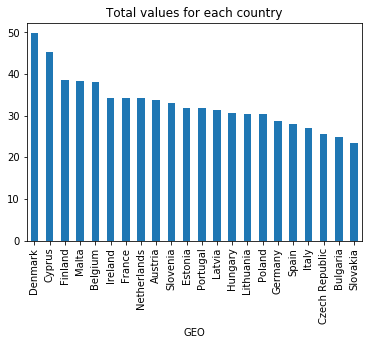

In [22]:
totalSum = pivedu.sum( axis = 1 ).sort_values( ascending = False )
totalSum.plot( kind = 'bar', style = 'b', title = "Total values for each country")

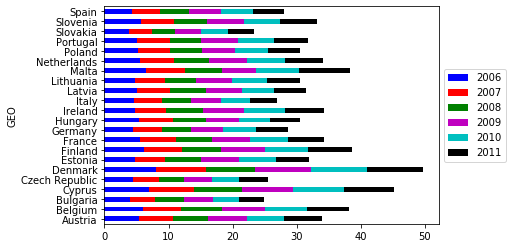

In [23]:
my_colors = [ "b", "r", "g", "m","c", "k" ]
ax = pivedu.plot( kind = "barh", stacked = True, color = my_colors )
ax.legend( loc = "center left", bbox_to_anchor = (1, 0.5))

## Descriptive Statistics

Descriptive statistics do not draw conclusions beyond what is being analyzed.
Descriptive statistics describe and summarize the data concisely and evaluate different ways to visualize them.

But first, data preparation:
1. *Obtaining the data*
2. *Parsing the Data*
3. *Cleaning the Data*
4. *Building data Structures*

An example with 'Adult' from UCI's [Machine Learning Repo](https://archive.ics.uci.edu/ml/datasets/Adult)

In [24]:
#Obtain the data
textbooksGitURL = "https://raw.githubusercontent.com/DataScienceUB/introduction-datascience-python-book/master/files/ch03/adult.data"

adult_df = pd.read_csv( textbooksGitURL, sep=",", header=None)
adult_df = pd.DataFrame( adult_df )
adult_df.columns = ['age', 'type_employer', 'fnlwgt',
'education', 'education_num', 'marital', 'occupation', 'relationship', 'race',
'sex', 'capital_gain', 'capital_loss', 'hr_per_week', 'country', 'income']

adult_df.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [25]:
adult_df.shape

(32561, 15)

In [26]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32561 non-null  int64 
 1   type_employer  32561 non-null  object
 2   fnlwgt         32561 non-null  int64 
 3   education      32561 non-null  object
 4   education_num  32561 non-null  int64 
 5   marital        32561 non-null  object
 6   occupation     32561 non-null  object
 7   relationship   32561 non-null  object
 8   race           32561 non-null  object
 9   sex            32561 non-null  object
 10  capital_gain   32561 non-null  int64 
 11  capital_loss   32561 non-null  int64 
 12  hr_per_week    32561 non-null  int64 
 13  country        32561 non-null  object
 14  income         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [27]:
#count the number of items per country
counts = adult_df.groupby( 'country' ).size( )
print( counts.head( ) )

country
 ?           583
 Cambodia     19
 Canada      121
 China        75
 Columbia     59
dtype: int64


The *sample distribution* of the data can be used to approximate the *population distribution*

####  Proportion

In [28]:
countsIncome = adult_df.groupby( 'income' ).size( )
print( countsIncome )

income
 <=50K    24720
 >50K      7841
dtype: int64


In [29]:
countsGender = adult_df.groupby( 'sex' ).size( )
print( countsGender.head( ) )

sex
 Female    10771
 Male      21790
dtype: int64


In [30]:
countsGenIncome = adult_df.groupby( ['sex', 'income'] ).size( )
print( countsGenIncome )

sex      income
 Female   <=50K     9592
          >50K      1179
 Male     <=50K    15128
          >50K      6662
dtype: int64


In [31]:
print( 'The proportion of female high earners: ', countsGenIncome[1]/countsGender[0]*100 )
print( 'The proportion of male high earners: ', countsGenIncome[3]/countsGender[1]*100 )   
print( 'The population proportion of high earners: ', countsIncome[1]/( countsIncome[0] + countsIncome[1])*100)

The proportion of female high earners:  10.946058861758425
The proportion of male high earners:  30.573657641119777
The population proportion of high earners:  24.080955744602438


In [32]:
adult_df.groupby(['sex'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,10771.0,36.858230,14.013697,17.0,25.0,35.0,46.0,90.0
Male,21790.0,39.433547,13.370630,17.0,29.0,38.0,48.0,90.0


### Exploratory Data Analysis

#### Summarizing the Data
**Categorical Data:** simple tabulation of frequncy is best non-graphical rep. ex: proportions of a category
**Quantitative Data:** exploratory data analysis is a way to make preliminary assessments about the populatio distribution of a variable.

The characteristics of our randomly observed samples are interesting only to the degree that they represent the population of the data they came from.

#### Mean
the sum of the values divided by the number of values

$$\mu = \frac{1}{n}\sum_{i = 1}^{n} x_i$$

In [33]:
genderAgeStats = pd.DataFrame( adult_df.groupby(['sex'])['age'].describe() )
print( 'The average age of men is: ', genderAgeStats['mean'][1])
print( 'The average age of women is: ', genderAgeStats['mean'][0])
genderAgeStats

The average age of men is:  39.43354749885268
The average age of women is:  36.85823043357163


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,10771.0,36.858230,14.013697,17.0,25.0,35.0,46.0,90.0
Male,21790.0,39.433547,13.370630,17.0,29.0,38.0,48.0,90.0


In [34]:
genderIncomeAgeStats = pd.DataFrame( adult_df.groupby(['sex','income'])['age'].describe() )
print( 'The average age of men is: ', genderIncomeAgeStats['mean'][3])
print( 'The average age of women is: ', genderIncomeAgeStats['mean'][1])
genderIncomeAgeStats

The average age of men is:  44.62578805163614
The average age of women is:  42.125530110262936


count       mean        std   min   25%   50%   75%   max
sex     income                                                             
 Female  <=50K   9592.0  36.210801  14.256801  17.0  24.0  34.0  46.0  90.0
         >50K    1179.0  42.125530  10.460104  19.0  34.0  41.0  49.0  90.0
 Male    <=50K  15128.0  37.147012  13.856113  17.0  26.0  35.0  46.0  90.0
         >50K    6662.0  44.625788  10.485469  19.0  37.0  44.0  51.0  90.0

#### Sample Variance
the variance describes the spread of the data. the variance is the mean squared deviation. the square root of the variance is the standard deviation.

$$\sigma^{n} = \frac{1}{n}\sum_{i} (x_i-\mu)^2$$

here we will consider the standard deviation because it is easier to interpret

In [35]:
print( 'Statistics of age for women: \nmu: ', genderAgeStats['mean'][0],
     '\nvar: ', genderAgeStats['std'][0]**2,
     '\nstd: ', genderAgeStats['std'][0],
      '\nStatistics of age for men: \nmu: ', genderAgeStats['mean'][1],
     '\nvar: ', genderAgeStats['std'][1]**2,
     '\nstd: ', genderAgeStats['std'][1])

Statistics of age for women: 
mu:  36.85823043357163 
var:  196.38370639480374 
std:  14.01369709943824 
Statistics of age for men: 
mu:  39.43354749885268 
var:  178.77375174530096 
std:  13.37063019252649


#### Median, Quantiles & Percents


In [36]:
print( 'Median age for men and women: ', genderAgeStats['50%'][1], ', ', genderAgeStats['50%'][0])
print( 'Median age for men and women with high income: ', genderIncomeAgeStats['50%'][3], 
      ', ', genderIncomeAgeStats['50%'][1])

Median age for men and women:  38.0 ,  35.0
Median age for men and women with high income:  44.0 ,  41.0


In [37]:
print( 'The IQR for men and women: ', (genderAgeStats['75%'][1]-genderAgeStats['25%'][1]),
     ', ', (genderAgeStats['75%'][0]-genderAgeStats['25%'][0]),
     '\nThe IQR for men and women with high income: ', 
      (genderIncomeAgeStats['75%'][3]-genderIncomeAgeStats['25%'][3]), ', ',
      (genderIncomeAgeStats['75%'][1]-genderIncomeAgeStats['25%'][1]))

The IQR for men and women:  19.0 ,  21.0 
The IQR for men and women with high income:  14.0 ,  15.0


#### Data Distributions



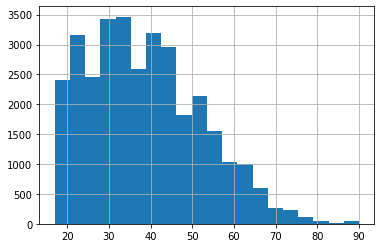

In [38]:
adult_df['age'].hist( density = 0, histtype = 'stepfilled', bins = 20 )

In [39]:
file = open( '/home/bonzilla/Desktop/ReadingLearningTinkering/adult_data.txt' )

def chr_int( a ):
    if a.isdigit(): return int( a )
    else: return 0

data = []

for line in file:
    data1 = line.split(', ')
    if len( data1 ) == 15:
        data.append( [chr_int( data1[0]), data1[1],
                     chr_int( data1[2]), data1[3],
                     chr_int( data1[4]), data1[5],
                     data1[6], data1[7], data1[8],
                     data1[9], chr_int( data1[10]),
                     chr_int(data1[11]), chr_int(data1[12]),
                     data1[13], data1[14]])

In [40]:
print(data[1:2])
df = pd.DataFrame( data )
df.columns = ['age' , 'type_employer' , 'fnlwgt' ,
 'education', 'education_num', 'marital',
'occupation' , 'relationship' , 'race' ,
'sex' , 'capital_gain' , 'capital_loss' ,
'hr_per_week', 'country', 'income']

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K\n']]


In [41]:
males = df[( df.sex == 'Male') ]
females = df[( df.sex == 'Female')]

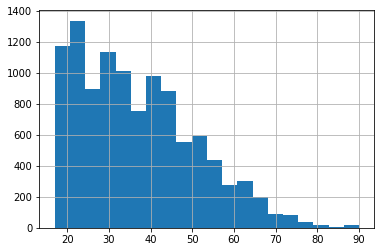

In [42]:
female_ages = females['age']
female_ages.hist( histtype='stepfilled', bins=20)

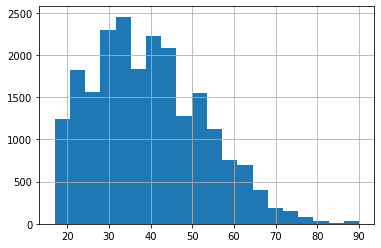

In [43]:
male_ages = males['age']
male_ages.hist( histtype='stepfilled', bins=20)

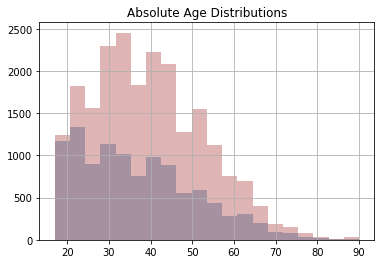

In [44]:
import seaborn as sns
female_ages.hist( alpha=0.5, histtype='stepfilled', bins=20).set_title('Absolute Age Distributions')
male_ages.hist( alpha=0.5, histtype='stepfilled', bins=20, color=sns.desaturate("indianred",0.75))

**Normalization** the above histogram shows that there are many more men sampled than women. However, it is not a very informative figure for understanding the differences of age distributions between the 2 genders. The next figure normalizes for the number of samples in each group with the matplotlib `hist` argument, `density`.

`density` normalizes the bin counts to give a probability density.

**Probability Density Distribution** the cumulative sum of the bins == 1. 

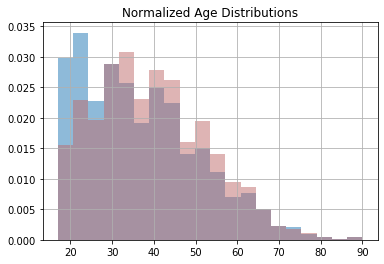

In [45]:
female_ages.hist( density=1, alpha=0.5, histtype='stepfilled', bins=20).set_title('Normalized Age Distributions')
male_ages.hist( density=1, alpha=0.5, histtype='stepfilled', bins=20, color=sns.desaturate("indianred",0.75))

**Cumulative Distribution Fxn** a figure that describes the probability that a real-valued random variable $X$ with a given probability distribution will be found to have a value less than or equal to $x$. 

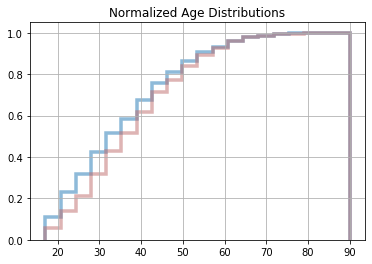

In [46]:
female_ages.hist( density=1, alpha=0.5, histtype='step', 
                 bins=20, cumulative=1, linewidth=3.5).set_title('Normalized Age Distributions')
male_ages.hist( density=1, alpha=0.5, histtype='step', bins=20, 
               color=sns.desaturate("indianred",0.75), cumulative=1, linewidth=3.5)

#### Outlier Treatment

1. Samples that are far from the median
2. Samples that exceed the mean by 2 or 3 standard deviations

In [47]:
df_filtered = df.drop( df.index[
    (df.income == '>50K\n') &
    (df['age'] > df['age'].median()+35) &
    (df['age'] > df['age'].median()-15)])

print( df_filtered.size)
print( df.size)

487380
488415


In [48]:
filt_males = df_filtered[( df_filtered.sex == 'Male') ]
filt_females = df_filtered[( df_filtered.sex == 'Female')]
fm_age = filt_males['age']
ff_age = filt_females['age']

In [49]:
print( 'Female Age Stats before filtering: ')
female_ages.describe()

Female Age Stats before filtering: 


count    10771.000000
mean        36.858230
std         14.013697
min         17.000000
25%         25.000000
50%         35.000000
75%         46.000000
max         90.000000
Name: age, dtype: float64

In [50]:
print( '\nFemale Age Stats After filtering:')
ff_age.describe()


Female Age Stats After filtering:


count    10763.000000
mean        36.827279
std         13.971564
min         17.000000
25%         25.000000
50%         35.000000
75%         46.000000
max         90.000000
Name: age, dtype: float64

In [51]:
print( 'Male Age Stats before filtering: ')
male_ages.describe()

Male Age Stats before filtering: 


count    21790.000000
mean        39.433547
std         13.370630
min         17.000000
25%         29.000000
50%         38.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [52]:
print( 'Male Age Stats after filtering: ')
fm_age.describe()

Male Age Stats after filtering: 


count    21729.000000
mean        39.325464
std         13.230138
min         17.000000
25%         29.000000
50%         38.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

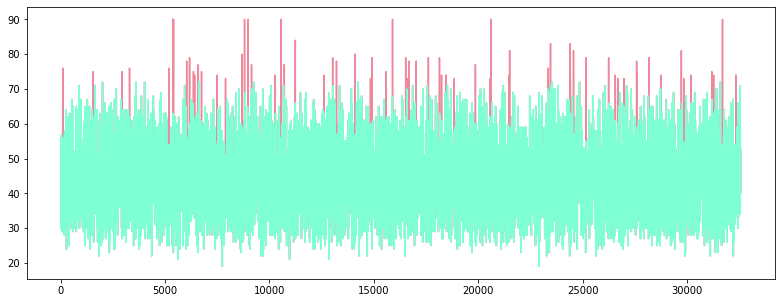

In [53]:
#Visualizing the Outliers that were removed
plt.figure(figsize = (13.4, 5))
df.age[(df.income == ">50K\n")].plot(alpha=0.5, color='crimson')
df_filtered.age[(df_filtered.income == ">50K\n")].plot(alpha=1, color='aquamarine')

In [54]:
print( 'The mean difference with outliers: ', round(male_ages.mean()-female_ages.mean(),3))
print( '\nThe mean difference without outliers: ', round(fm_age.mean()-ff_age.mean(),3))

The mean difference with outliers:  2.575

The mean difference without outliers:  2.498


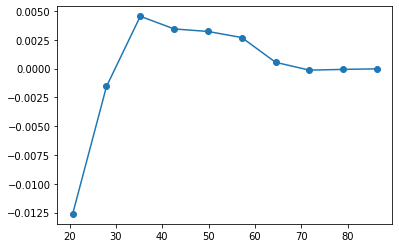

In [55]:
countx, divisionx = np.histogram( fm_age, density=1)
county, divisiony = np.histogram( ff_age, density=1)

val = [(divisionx[i] + divisionx[i+1])/2
      for i in range(len(divisionx)-1)]

plt.plot(val, countx - county, 'o-')

#### Measuring Asymmetry: skewness and Pearson's median skewness coef.

measureing the asymmetry in a set of univariate data:
$$g_1 = \frac{1}{n}\frac{\sum_{i} (x_i-\mu^3)}{\sigma^3}$$

In [56]:
def skewness(x):
    res = 0
    m = x.mean()
    s = x.std()
    for i in x:
        res += (i-m)*(i-m)*(i-m)
    res /= (len(x)*s*s*s)
    return res

In [57]:
print('Skewness of male sample: ', skewness( male_ages ),
     '\nSkewness of female sample: ', skewness( female_ages ))

Skewness of male sample:  0.5197695091628508 
Skewness of female sample:  0.6787226057767358


In [58]:
def pearson( x ):
    return 3*( x.mean() - x.median())*x.std()

In [59]:
print('Pearsons coef. of male sample: ', pearson( male_ages ),
     '\nPearsons coef. of female sample: ', pearson( female_ages ))

Pearsons coef. of male sample:  57.50230041174153 
Pearsons coef. of female sample:  78.12203531109172


#### Kernal Density Estimation

estimating the continuous representation of a distribution. e.g. a Gaussian kernal.  
if we consider a Gaussian kernal around the data, the sum of those kernals can give us a continuous function that when normalized would approximate the density of the distribution

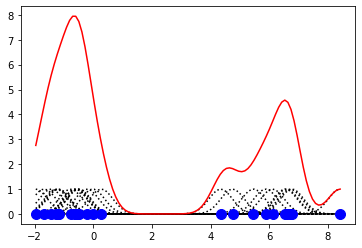

In [60]:
from scipy.stats import norm

x1 = np.random.normal( -1, 0.5, 15 )
x2 = np.random.normal( 6, 1, 10 )
y = np.r_[ x1, x2 ]
x = np.linspace( min(y), max(y), 100 )
s = 0.4

kernels = np.transpose([ norm.pdf( x, yi, s ) for yi in y ])

plt.plot( x, kernels, 'k:' )
plt.plot( x, kernels.sum( 1 ), 'r' )
plt.plot( y, np.zeros( len( y ) ), 'bo', ms =10 )

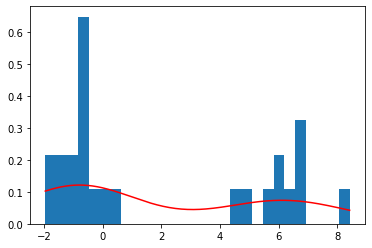

In [61]:
from scipy.stats import kde
density = kde.gaussian_kde( y )
xgrid = np.linspace( x.min(), x.max(), 200)
plt.hist( y, bins = 28, density = True )
plt.plot( xgrid, density( xgrid ), 'r-' )

#### Estimation 

using estimates to approximate the values of unknown parameters of the dataset.
**point estimates** single numerical estimates of parameters of a population

##### Mean
if there are no outliers, the sample mean minimizes the Mean Squared Error.

**Mean Squared Error** : the average of the squares of the differences between the observed and the actual data
$$MSE =  \frac{1}{n}\sum (\overline{x}-\mu)^2 $$


In [62]:
NTs = 200
mu = 0.0
var = 1.0
err = 0.0
NPs = 1000
for i in range( NTs ):
    x = np.random.normal( mu, var, NPs )
    err += ( x.mean() -mu)**2
print( 'MSE: ', err/NTs )   

MSE:  0.0009941800725141062


##### Variance

$$\overline{\sigma}^2 =  \frac{1}{n}\sum (x_i - \overline{x})^2 $$

##### Standard Score

$$z_i=  \frac{(x_i - \mu)}{\sigma}$$

##### Corvariance
two variables, $X$ & $Y$, share the same tendecy

$$Cov(X, Y) =  \frac{1}{n}\sum^{n}_{i=1}dx_idy_i$$

##### Pearson's Correlation
normaliza the data with respect to their deviation ... multiplying the standard scores.

$$\rho = \frac{x_i - \mu_X}{\sigma_X}\frac{y_i - \mu_Y}{\sigma_Y} = \frac{Cov(X, Y)}{\sigma_X\sigma_Y}$$

Pearson's correlation is always between -1 and +1, where the magnitude depends on the degree of correlation (+ or -), it means that the variable can predict the other very well. However, having a $rho$=0, does not necessarily mean the variables are not correlated (Pearson's is not robust to nonlinear correlations). 

##### Spearman's Rank Correlation
use the ranks of the sorted sample data. is robust to outliers unline Pearson's.

## Statistical Inference


**frequentist approach** there is a population which can be represented by several parameters from which we can obtain numerous random samples. compute parameters about the sample and use these to infer probable propositions abount the population's parameters.  
  
**bayesian approach** parameters describing the data can be described probabilistically. produce parameter distributions that represent all the knowledge we can extract from the sample and from prior information about the problem.
  
#### Statistical Inference: The Frequentist Approach
produce probable propositions concerning population parameters:
1. **point estimates** e.g. mean/median & spread
2. **confidence intervals** range of values to describe a parameter
3. **hypothesis** accept or reject propositions

#### Measuring the Variability in Estimates
descriptive statistics are not equal to the truth, but they approach the truth as more data becomes available. 




In [63]:
dataSet_URL = 'https://raw.githubusercontent.com/SmilodonCub/introduction-datascience-python-book/master/files/ch04/ACCIDENTS_GU_BCN_2013.csv'

data = pd.read_csv( dataSet_URL, encoding = "ISO-8859-1")

In [64]:
data['Date'] = data[u'Dia de mes'].apply(lambda x: str(x)) + '-' + data[u'Mes de any'].apply(lambda x: str(x)) + '-2013'
#print(data['Date'].head())
data['Date'] = pd.to_datetime( data['Date'])
#print(data['Date'].head())
accidents = data.groupby(['Date']).size()
print( accidents.head() )
print( accidents.mean() )

Date
2013-01-01    16
2013-01-02    28
2013-01-03    28
2013-01-04    12
2013-01-05    15
dtype: int64
25.90958904109589


**sample mean** is a point estimate of the population mean. i.e. our best guess.  
**sampling distribution of the sample mean**

In [65]:
df = accidents.to_frame()
N_test = 1000
elements = 200
means = [0]*N_test
for i in range( N_test ):
    rows = np.random.choice( df.index.values, elements )
    sampled_df = df.loc[rows]
    means[i] = sampled_df.mean()
    
df2 = pd.DataFrame({'means': means}) 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb98727d8d0>]],
      dtype=object)

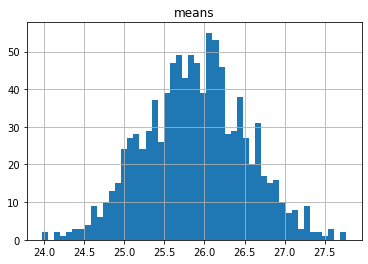

In [66]:
df2 = df2.astype('float64')
df2.hist( histtype='stepfilled', bins=50)

**Central Limit Theorem** In probability theory, the central limit theorem establishes that, in some situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution even if the original variables themselves are not normally distributed.  
*Given a population with a finite mean μ and a finite non-zero variance
σ 2 , the sampling distribution of the mean approaches a normal distribution with a
mean of μ and a variance of σ 2 /n as n, the sample size, increases.*

as a consequence of the CLT, it can be shown that the standard deviation of the sample mean is given by:

$$SE = \frac{\sigma_x}{\sqrt{n}}$$

...so how to give a measure of the variability of the sample mean? By giving the empiracle standard error of the mean distribution.

In [67]:
rows = np.random.choice( df.index.values, 200 )
sampled_df = df.loc[rows]
meansEst = sampled_df.std()/np.sqrt(200)
print('Direct estimate of SE from one sample of 200 elements: ', meansEst)
print('Estimation of the SE by 1000 simulations with 200 elements: ', df2.std())

Direct estimate of SE from one sample of 200 elements:  0    0.608524
dtype: float64
Estimation of the SE by 1000 simulations with 200 elements:  means    0.632241
dtype: float64


**bootstrapping** we draw n observations with replacement from the original data to create a resample. then calcular the point estimate. by repeating this process a large number of times, we can build a good approximation of the mean sampling distribution. this approach assumes that the sample contains sufficient information about the underlying distribution.

In [68]:
def meanBootstrap( X, numberb ):
    """bootstapping method"""
    x = [0]*numberb
    for i in range( numberb ):
        sample = [X[j] for j in np.random.randint( len(X), size = len(X))]
        x[i] = np.mean( sample )
    return x    

m = meanBootstrap( accidents, 1000 )
print( 'Mean estimate: ', np.mean( m ) )

Mean estimate:  25.902449315068495


**confidence interval** a plausible range of values for a parameter. e.g. roughly 95% of the time our estimate will be within 1.96 standard errors of the true mean of the distribution.. If the interval spreads out 1.96 standard errors from a normally distributed point estimate, we say that we are 95% confident that we have captured the true prameter.

In [69]:
m = accidents.mean()
se = accidents.std()/np.sqrt(len(accidents))
ci = [m - se*1.96, m + se*1.96]
print( "Confidence Interval: ", ci )


Confidence Interval:  [24.975156065800284, 26.8440220163915]


In [70]:
#compute the 95% confidence interval of the sample mean using bootstrapping
m = meanBootstrap( accidents, 10000 )
sample_mean = np.mean( m )
sample_se = np.std( m )
print( "The sample mean: ", sample_mean )
print( "SE of the estimate: ", sample_se )
ci = [np.percentile(m,2.5), np.percentile(m, 97.5)]
print( "Confidence Interval: ", ci)

The sample mean:  25.91349589041096
SE of the estimate:  0.47837446122957883
Confidence Interval:  [24.975342465753425, 26.873972602739727]


**To be 95% confident:** In 95% of the cases, when a 95% confidence interval is computed from a sample, the truw mean of the population will fall within the interval defined by theconfidence interval defined by $\pm 1.96 x SE $

### Hypothesis Testing

**hypothesis testing** the process of determining the statistical significance of an effect.
1. **The Null Hypothesis** $H_0$: There is no statistically significant difference between two samples
2. **The Alternative Hypothesis** $H_A$: There exists a statistically significant difference between the two samples.
  
can use the concept of confidence intervals to measure the plausibility of a hypothesis...

In [71]:
dataSet_URL2 = 'https://raw.githubusercontent.com/SmilodonCub/introduction-datascience-python-book/master/files/ch04/ACCIDENTS_GU_BCN_2010.csv'

data2 = pd.read_csv( dataSet_URL2, encoding = 'latin-1' )

In [72]:
data2['Date'] = data2[u'Dia de mes'].apply(lambda x: str(x)) + '-' + data2[u'Mes de any'].apply(lambda x: str(x)) + '-2013'
data2['Date'] = pd.to_datetime( data2['Date'])
counts2010 = data2['Date'].value_counts()
counts2013 = data['Date'].value_counts()

print( '2010 Mean: ', counts2010.mean(), '\n2013 Mean: ', counts2013.mean() )

2010 Mean:  24.81095890410959 
2013 Mean:  25.90958904109589


#### Hypothesis Testing with Confidence Intervals

In [73]:
#caluclate the confidence intervals for the mean rate of traffice accidents 2013
n = len( counts2013 )
mean = counts2013.mean( )
s = counts2013.std( )
ci = [ ( mean - s*1.96/np.sqrt(n) ), ( mean + s*1.96/np.sqrt(n) ) ]
print( '2010 accident rate estimate: ', counts2010.mean( ),
     '\n2013 accident rate estimate: ', counts2013.mean( ),
     '\nConfidence Interval for 2013: ', ci )

2010 accident rate estimate:  24.81095890410959 
2013 accident rate estimate:  25.90958904109589 
Confidence Interval for 2013:  [24.975156065800284, 26.8440220163915]


The 2010 estimate lies outside the confidence interval for the 2013 estimate therefore it cannot be ruled out that in 2013 the mean rate of traffic accidents was higher than in 2010.  
  
If we use a 95% confidence interval to test a problem where the null hypothesis is true, we will make an error whenever the point estimate is at least 1.96 standard errors away from the population parameter. This happens about 5% of the time (2.5% in each tail)  

#### Hypothesis Testing with *p-values*

**p-value** the probability of observing data at least as favorable to the alternative hypothesis as our current dataset, if the null hypothesis is true.  
  
*Given a sample and an apparent effect, what is the probability of seeing suzh an effect by chance?*
1. quantify the size of the apparent effect by choosing a test statistic (e.g. difference of sample means)
2. define a null hypothesis $H_0$ which is a model of the system based on the assumption that the effect is not real
3. compute a p-value, which is the probability of seeing the apparent effect if the null hypothesis is true.
4. interpret the results. if he p-value is below your criterion then it is very unlikely that the difference is due to the natural variance and it is very likely that this difference would exist in the population from which the sample was drawn.


In [74]:
#calculate the p-value
l2010 = len( counts2010 )
l2013 = len( counts2013 )
meanDiff = ( counts2013.mean() - counts2010.mean() )

print( 'num records 2010: ', l2010,
     '\nnum records 2013: ', l2013,
     '\ndifference of means: ', meanDiff )

num records 2010:  365 
num records 2013:  365 
difference of means:  1.0986301369863014


To approximate the p-values:
1. pool the distributions
2. generate samples with size n and compute the differences of the mean
3. count how many differences are larger than the observed one.

In [75]:
#pooling the distributions
pooledCounts = np.concatenate( [ counts2010, counts2013 ] )
np.random.shuffle( pooledCounts )

#generate samples
import random
NumSamples = 1000
diff = list(np.zeros(l2010))
for i in range( l2010 ):
    #print(i)
    p1 = [ random.choice( pooledCounts ) for _ in range( l2010 )]
    p2 = [ random.choice( pooledCounts ) for _ in range( l2010 )]
    diff[i] = ( np.mean( p1 ) - np.mean( p2 ) )
    
#evaluate how many differences are larger than the observed difference
diffa = np.array( diff )
test = np.where( diffa > meanDiff )[0]


In [76]:
#the differences that were greater (just to verify)
diffa[ test ]

array([1.29589041, 1.32876712, 1.22465753, 1.60821918, 1.31780822,
       1.61643836, 1.17534247, 1.1369863 , 1.89315068, 1.23561644,
       1.61917808, 1.35890411, 2.24109589, 1.16164384, 1.53150685,
       1.15890411, 1.22465753, 1.31506849])

In [77]:
print( 'p-value (Simulation) = ', len( test )/float( NumSamples ), 
     '(', round( len( test )/float( NumSamples )*100, 2 ), '%)')

print( 'Hypothesis Test Results: ' )
if ( len( test )/float( NumSamples ) ) < 0.05:
    print( 'The effect is likely' )
else:
    print( "The effect is not likely")

p-value (Simulation) =  0.018 ( 1.8 %)
Hypothesis Test Results: 
The effect is likely


## Supervised Learning

**Supervised Learning:** Algorithms which learn froma training set of labeled examples to generate the set of all possible inputs. e.g.: logistic regression, support vector machines, decision trees, random forest, etc.

**Classification** solution from a set of discrete possibilities ... select from a finite number of categories.

**Regression** solution is a prediction of a continuous-values quantity.

### Lending Club: predict unsuccessful accepted loans

$$\frac{loan - funded}{loan} \ge 0.95$$

predicting a binary value: either the loan is fully funded or not. 

In [3]:
import pickle
#path = '/home/bonzilla/Desktop/ReadingLearningTinkering/Intro2DS_IgualSegui_git/files/ch05/dataset_small.pkl'
#ofname = open(path,'rb')

aPickle = pd.read_pickle(r'/home/bonzilla/Desktop/ReadingLearningTinkering/Intro2DS_IgualSegui_git/files/ch05/dataset_small.pkl')

In [4]:
featureMat,labelVec = aPickle
labelVec
dims = featureMat.shape[1]
N = featureMat.shape[0]
print( 'dims: ', dims, '\nsamples: ', N )

dims:  15 
samples:  4140


In [5]:
#apply a classifier using scikit-learn
from sklearn import neighbors
from sklearn import datasets

#create an instance of K-NN
knn = neighbors.KNeighborsClassifier( n_neighbors = 11 )

#train the classifier
knn.fit( featureMat,labelVec )

#comput the prediction according to the model
yhat = knn.predict( featureMat )

print( 'Predicted Values; ', yhat[-1], '\nReal Target: ', labelVec[-1])

Predicted Values;  -1.0 
Real Target:  -1.0


The most basic measure of performance of a classifier is its accuracy

$$acc = \frac{Number of Correct Predictions}{n}$$

In [6]:
#classification accuracy
knn.score( featureMat,labelVec )

0.8316425120772947

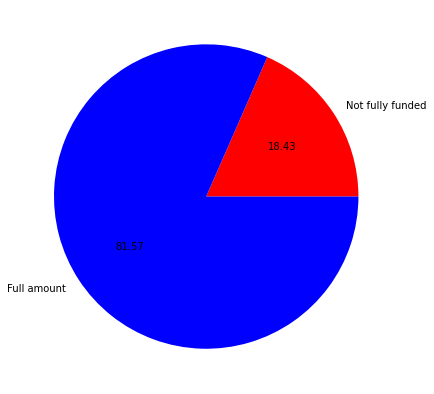

In [7]:
#but first let's look at data....
plt.pie( np.c_[ np.sum( np.where( labelVec == 1, 1, 0 )),
              np.sum( np.where( labelVec == -1, 1, 0))][0],
       labels = ['Not fully funded', 'Full amount'],
       colors = ['r', 'b'],
       autopct = '%.2f')
plt.gcf().set_size_inches((7,7))

So, the KNN score labelled *Full Amount* with an accuracy of 83.2%. However, *Full Amount* cases make up 81.6% of the cases. Therefore, the KNN fit just barely outperforms chance.

In [8]:
#compute a confusion matrix 
yhat = knn.predict( featureMat )
TP = np.sum( np.logical_and( yhat == -1, labelVec == -1))
TN = np.sum( np.logical_and( yhat == 1, labelVec == 1))
FP = np.sum( np.logical_and( yhat == -1, labelVec == 1))
FN = np.sum( np.logical_and( yhat == 1, labelVec == -1))


from tabulate import tabulate
print(tabulate([['', 'Positive IRL', 'Negative IRL'], ['Predict Positive', TP, FP], ['Predict Negative', FN, TN ]]))


----------------  ------------  ------------
                  Positive IRL  Negative IRL
Predict Positive  3370          690
Predict Negative  7             73
----------------  ------------  ------------


**Confusion Matrix** classifier outcome and ground truth
1. **True Positive** when the classifier predicts a sample as positive and it really is position
2. **False Positive** when the classifier predicts a sample as positive but in fact it is negative
3. **True Negative** when the classifier predicts a sample as negative and it really is negative
4. **False Negative** when the classifier predicts a sample as negative when in fact it is positive

**Accuracy**  
$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

**Column-wise performance metrics**
$$Sensitivity = \frac{TP}{Real Positives} = \frac{TP}{TP + FN}$$
$$Specificity = \frac{TN}{Real Negatives} = \frac{TN}{TN + FP}$$

**Row-wise performance metrics**
$$Precision = \frac{TP}{Predicted Positives} = \frac{TP}{TP + FP}$$
$$Negative Prediction Value = \frac{TN}{Predicted Negatives} = \frac{TN}{TN + FN}$$



In [9]:
#train a classifyer with 1 NN
#create an instance of K-NN
knn = neighbors.KNeighborsClassifier( n_neighbors = 1 )

#train the classifier
knn.fit( featureMat,labelVec )

#comput the prediction according to the model
yhat = knn.predict( featureMat )

from sklearn import metrics
metrics.confusion_matrix( yhat, labelVec )

array([[3377,    0],
       [   0,  763]])

**BIG PROBLEM** the knn classification was performed on the same data that it was fit with. In realy applications need to deploy a model different data.  
  
Split the data into train/test subsets:  

In [10]:
#Randomize a split in the data
perm = np.random.permutation( labelVec.size )
PRC = 0.7
split_point = int( np.ceil( labelVec.shape[0]*PRC))

featureMat_train = featureMat[ perm[ :split_point ].ravel(), :]
labelVec_train = labelVec[ perm[ :split_point ].ravel()]

featureMat_test = featureMat[ perm[ split_point: ].ravel(), :]
labelVec_test = labelVec[ perm[ split_point: ].ravel()]

print( "fM train size: ", featureMat_train.shape, "\tlV train size: ", labelVec_train.shape,
      "\nfM test size: ", featureMat_test.shape, "\tlV test size: ", labelVec_test.shape )

fM train size:  (2898, 15) 	lV train size:  (2898,) 
fM test size:  (1242, 15) 	lV test size:  (1242,)


In [11]:
#train KNN on the training set
knn = neighbors.KNeighborsClassifier( n_neighbors = 1 )
knn.fit( featureMat_train,labelVec_train )
yhat = knn.predict( featureMat_train )

metrics.confusion_matrix( yhat, labelVec_train )

array([[2367,    0],
       [   0,  531]])

In [12]:
#now test on the 'new' data
yhat = knn.predict( featureMat_test )
metrics.confusion_matrix( yhat, labelVec_test )

array([[861, 166],
       [149,  66]])

In [13]:
#lets run this many times to get a good estimate of the model performance
from sklearn.model_selection import train_test_split

PRC = 0.3
numIter = 100
acc = np.zeros((numIter,))
for i in range(numIter):
    X_train, X_test, Y_train, Y_test = train_test_split( featureMat_train,labelVec_train, test_size = PRC )
    knn = neighbors.KNeighborsClassifier( n_neighbors = 1 )
    knn.fit( X_train, Y_train )
    yhat = knn.predict( X_test )
    acc[i] = metrics.accuracy_score( yhat, Y_test )
acc.shape = ( 1,numIter )  
print( "mean expected error: ", np.mean( acc[0] ))

mean expected error:  0.7518275862068967


*In sample error $E_{in}$*: training error is the error measured over all the observed data samples in the training set.
$$E_{in} = \frac{1}{N} \sum^{N}_{i=1} e(x_i,y_i)$$

*Out-of-sample error*: or generalization error measures the expected error on unseen data. Can be approximated by withholding some data from the training set for testing.
$$E_{out} = E_{x,y}(e(x,y))$$

In [14]:
#lets run many times over several values of n_neighbors
PRC = 0.3
numIter = 100
highestKNN = 12
allKNN_ExpErr = np.zeros((highestKNN,))
for eye in range(1, highestKNN):
    acc = np.zeros((numIter,))
    for i in range(numIter):
        X_train, X_test, Y_train, Y_test = train_test_split( featureMat_train,labelVec_train, test_size = PRC )
        knn = neighbors.KNeighborsClassifier( n_neighbors = eye )
        knn.fit( X_train, Y_train )
        yhat = knn.predict( X_test )
        acc[i] = metrics.accuracy_score( yhat, Y_test )
    acc.shape = ( 1,numIter ) 
    allKNN_ExpErr[eye] = np.mean( acc[0] )
    #print( "mean expected error: ", np.mean( acc[0] ))

Text(0.5, 0, 'KNN')

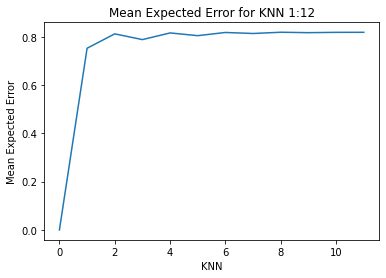

In [15]:
plt.plot( range(highestKNN), allKNN_ExpErr )
plt.title( "Mean Expected Error for KNN 1:12")
plt.ylabel( "Mean Expected Error" )
plt.xlabel( "KNN" )

In [16]:
#select from several classifiers
from sklearn import tree
from sklearn import svm

PRC = 0.1
acc_r = np.zeros((10,4))

for eye in range( 10 ):
    X_train, X_test, Y_train, Y_test = train_test_split( featureMat_train,labelVec_train, test_size = PRC )
    
    nn1 = neighbors.KNeighborsClassifier( n_neighbors = 1 )
    nn3 = neighbors.KNeighborsClassifier( n_neighbors = 3 )
    svc = svm.SVC()
    dt = tree.DecisionTreeClassifier()
    
    nn1.fit( X_train, Y_train )
    nn3.fit( X_train, Y_train )
    svc.fit( X_train, Y_train )
    dt.fit( X_train, Y_train )
    
    yhat_nn1 = nn1.predict( X_test )
    yhat_nn3 = nn3.predict( X_test )
    yhat_svc = svc.predict( X_test )
    yhat_dt = dt.predict( X_test )
    
    #print( eye )
    acc_r[eye][ 0] = metrics.accuracy_score( yhat_nn1, Y_test )
    acc_r[eye][1] = metrics.accuracy_score( yhat_nn3, Y_test )
    acc_r[eye][2] = metrics.accuracy_score( yhat_svc, Y_test )
    acc_r[eye][3] = metrics.accuracy_score( yhat_dt, Y_test )

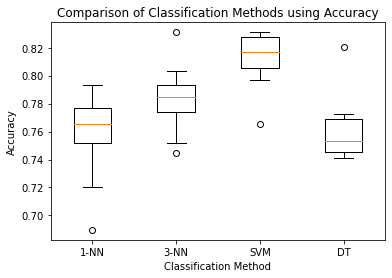

In [17]:
plt.boxplot( acc_r )
plt.title( "Comparison of Classification Methods using Accuracy")
plt.xlabel( "Classification Method")
plt.ylabel( "Accuracy")
plt.xticks([1, 2, 3, 4], ["1-NN", "3-NN", "SVM", "DT"])
plt.show()

1-NN appears to have the lowest error rate of the for classifiers that were applied above.

This type of classifier comparison is known as **cross-validation**. There are other cross-validation methods:
1. **Leave-one-out** given N samples, train with N-1 samples and test with 1. repeat N times and compute the mean
2. **K-fold** divide into K nonoverlapping splits. train on K-1 splits and test on 1. repeat K times and take the mean.

### What is Learning?

**training error** error measured over the observed data samples in the training set
**generalization error** error expected on unseen data

**THE GOAL OF LEARNING IS TO MINIMIZE GENERALIZATION ERROR** 

**Learning Curves**
1. as the number of training samples increases, both errors tend to the same value
2. when we have few training data, the training error is very small but the test error is very large
3. with a low degree of complexity, the training and test errors converge to the bias sooner (w/fewer data)
4. with a low degree of complexity, the error of convergence is larger than with increased complexity

**overfitting** models are usually parameterized with hyperparameters. selecting the complexity of the model is usually governed by the parameters. a good heuristic is to choose the value of the hyperparameter that yields the smalled estimate test error (e.g. X-NN, or depth of DT)

**regularization** penalize overly complex models. 
1. L2 weight: favor low complexity 'smooth' models
2. L1 weight: favor sparse models with few components

**ensemble techniques**


### Training, Validating and Test
**testing** process of assessing the performance of the classifier by estimating the generalization error
**validation** the process of selecting the best hyperparameters. the process of selecting a model using the estimation of generalization error
**hyperparameter** a parameters whose value controls the learning process

we now need to divide the data into three sets:
**test data** used exclusively for assessing performance at the end of the process and will never be used in the learning process
**validation data** used explicitely to select parameters/models with the best performance according to an estimation of the generalization error. This is a form of learning.
**training data** used to learn the instance of the model


In [37]:
from sklearn.model_selection import KFold
kf = KFold( n_splits = 10, shuffle = True, random_state = 0)
kf.split(featureMat)
kf.get_n_splits()

10

In [66]:
#create a 10-fold cross-validation set
from sklearn.model_selection import KFold
kf = KFold( n_splits = 10, shuffle = True, random_state = 0)

#search for the paramter in this range:
C = np.arange( 2, 20,)
acc = np.zeros((10,18))
i = 0
for train_index, val_index in kf.split(featureMat):
    X_train, X_val = featureMat[train_index], featureMat[val_index]
    y_train, y_val = labelVec[train_index], labelVec[val_index]
    #print( X_train.shape, Y_train.shape, X_val.shape, y_val.shape )
    j = 0
    for c in C:
        dt = tree.DecisionTreeClassifier(
        min_samples_leaf = 1,
        max_depth = c )
        dt.fit( X_train, y_train )
        yhat = dt.predict( X_val )
        acc[i][j] = metrics.accuracy_score( yhat, y_val )
        j = j + 1
    i = i + 1
        
#knn.score( featureMat,labelVec ) x,y

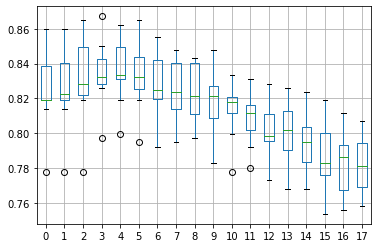

In [67]:
acc_df =pd.DataFrame( acc )
acc_df.head()
boxplot = acc_df.boxplot()

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( featureMat, labelVec, test_size = 0.20 )

kf = KFold( n_splits = 10, shuffle = True, random_state = 0)

#search for the paramter in this range:
C = np.arange( 2, 20,)
acc = np.zeros((10,18))
i = 0
for train_index, val_index in kf.split(featureMat):
    #print( train_index.shape, val_index.shape )
    #print( X_train.shape, y_train.shape)
    X_t, X_val = featureMat[train_index], featureMat[val_index]
    y_t, y_val = labelVec[train_index], labelVec[val_index]
    #print( X_train.shape, Y_train.shape, X_val.shape, y_val.shape )
    j = 0
    for c in C:
        dt = tree.DecisionTreeClassifier(
        min_samples_leaf = 1,
        max_depth = c )
        dt.fit( X_t, y_t )
        yhat = dt.predict( X_val )
        acc[i][j] = metrics.accuracy_score( yhat, y_val )
        j = j + 1
    i = i + 1

In [84]:
print( 'Mean Accuracy:' + str( np.mean( acc, axis=0)))
print( 'Selected Model Index:' + str( np.argmax( np.mean( acc, axis=0) )))

Mean Accuracy:[0.82536232 0.8263285  0.83188406 0.83405797 0.83550725 0.83381643
 0.8294686  0.82439614 0.82270531 0.81908213 0.81256039 0.80700483
 0.8031401  0.79758454 0.79855072 0.78309179 0.7794686  0.78091787]
Selected Model Index:4


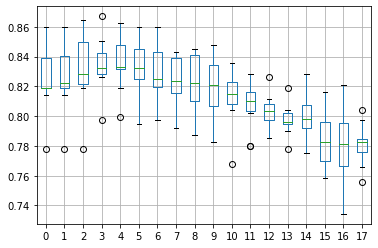

In [80]:
acc_df =pd.DataFrame( acc )
acc_df.head()
boxplot = acc_df.boxplot()

In [86]:
#Train the model with the complete training set using the selected complexity
dt = tree.DecisionTreeClassifier( min_samples_leaf = 1,
                                max_depth = C[np.argmax( np.mean( acc, axis=0) )])
dt.fit( X_train, y_train )

#Test the model with the test set
yhat = dt.predict( X_test )
print( 'Test Accuracy: ' + str( metrics.accuracy_score( yhat, y_test )))

Test Accuracy: 0.8260869565217391


In [91]:
# train the final model
dt = tree.DecisionTreeClassifier( min_samples_leaf = 1, max_depth = C[ 4])
dt.fit( featureMat,labelVec  )
yhat = dt.predict( featureMat )
print( 'Test Accuracy: ' + str( metrics.accuracy_score( yhat, labelVec )))

Test Accuracy: 0.8524154589371981


### Two Learning Models: SVM & random forests
To be able to learn, an algorithm must meet these criteria:
1. *The model class/hypothesis space* The target decision boundary will be approximated from one element of this space.
2. *The problem model* formalizes and encodes the desired propertes of the solution
3. *The learning algorithm* an optimization/search method or algorithm that, given a model class, fits it to the training data according to the error function.

**SVM: Support Vector Machine**
SVMs fit linear boundaries between samplesof a binary problem, ensuring the maximum robustness. Goal is to find the separating hyperplane with the maximum margin

**Random Forest**
an ensemble technique that combines classifiers using aggregation techniques.

**Decision Trees**
partitioning space into patches and fit a model to a patch. How to partition the space? What model to use for each patch



### Ending the Learning Process


In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

parameters = { 'C': [1e4, 1e5, 1e6 ],
             'gamma': [1e-5, 1e-4, 1e-3 ] }

N_folds = 5

kf = KFold( n_splits = N_folds, shuffle = True, random_state = 0)

acc = np.zeros((N_folds,))
i = 0
yhat = labelVec.copy()
for train_index, test_index in kf.split(featureMat):
    X_train, X_test = featureMat[train_index,:], featureMat[ test_index,:]
    y_train, y_test = labelVec[train_index], labelVec[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform( X_train )
    clf = svm.SVC( kernel = 'rbf' )
    clf = GridSearchCV( clf, parameters, cv = 3)
    clf.fit( X_train, y_train.ravel())
    X_test = scaler.transform( X_test )
    yhat[ test_index ] = clf.predict( X_test )
    
print( metrics.accuracy_score( yhat,labelVec ) )
print( metrics.confusion_matrix( yhat, labelVec ))

#knn.score( featureMat,labelVec ) x,y

0.856280193236715
[[3372  590]
 [   5  173]]


## Regression Analysis
**regression** making predictions about real-world quantities. a response expressed as the combination of one or more independant variables

### Linear Regression
**linear model** the response **y** depends linearly on the variables $x_{i}$
$$y = a_1x_1 + \cdots + a_dx_d$$
where a_i are the parameters, or coefficients of the model
or
$$ y = Xw $$
where,

$$y = \begin{bmatrix}
y_1 \\ y_2 \\ \vdots  \\ y_n
\end{bmatrix}
,
X = \begin{bmatrix}
x_{11} & \cdots & x_{1d} \\
x_{21} & \cdots & x_{2d} \\
\vdots & \ddots & \vdots \\
x_{n1} & \cdots & x_{nd}
\end{bmatrix}
,
w = \begin{bmatrix}
a_1 \\ a_2 \\ \vdots \\ a_n
\end{bmatrix}
$$
<br>
*Ordinary Least Squares*(OLS) is the simplest and most common estimator of the linear regression coefficients. OLS: paraeters are chosen that minimize the square of the distance between the predicted values and the actual values

In [109]:
#Sea Ice example
icePath = "https://raw.githubusercontent.com/DataScienceUB/introduction-datascience-python-book/master/files/ch06/SeaIce.txt"
ice = pd.read_csv( icePath, delim_whitespace = True )

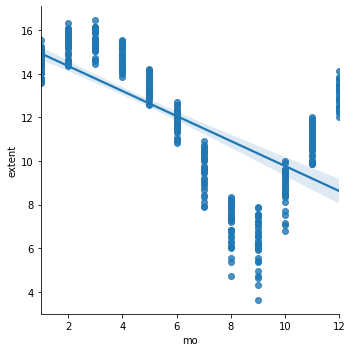

In [110]:
ice2 = ice[ice.data_type != '-9999']
sns.lmplot( 'mo', 'extent', ice2)

In [111]:
month_means = ice2.groupby(['mo'])['extent'].mean()
month_means

mo
1     14.479429
2     15.298889
3     15.491714
4     14.766000
5     13.396000
6     11.860000
7      9.601143
8      7.122286
9      6.404857
10     8.809143
11    10.964722
12    13.059429
Name: extent, dtype: float64

/home/bonzilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/bonzilla/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


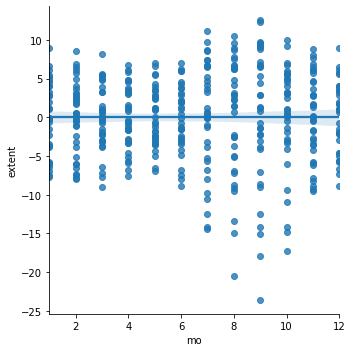

In [112]:
for i in range( 12 ):
    ice2.extent[ ice2.mo == i+1 ] = 100*( ice2.extent[ ice2.mo == i+1 ] - month_means[ i+1 ] )/month_means.mean()

sns.lmplot( 'mo', 'extent', ice2)
    

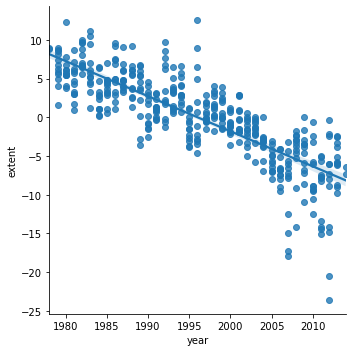

In [113]:
sns.lmplot( 'year', 'extent', ice2)

In [114]:
#now using sklearn
from sklearn.linear_model import LinearRegression
est = LinearRegression( fit_intercept = True )

In [118]:
x = ice2[['year']]
y = ice2[['extent']]
est.fit( x,y )
print( 'Coefficients:', est.coef_)
print( 'Intercept:', est.intercept_)

Coefficients: [[-0.45275459]]
Intercept: [903.71640207]


ValueError: Expected 2D array, got 1D array instead:
array=[2025].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [122]:
x = [2025]
y_hat = .predict( x )
m = 1
y_hat = ( y_hat*month_means.mean()/100 ) + month_means[m]
print( 'Prediction of extent for January 2025:', y_hat )

ValueError: Expected 2D array, got 1D array instead:
array=[2025].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### linkyLinkLinks
https://github.com/DataScienceUB/introduction-datascience-python-book